### 1 . Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Importing DataSet

In [60]:
data = pd.read_csv("/Users/akhileshram/NM/Product_Demand_Prediction/Phase_2/ProductDemand.csv")

### First Five Rows

In [3]:
data.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


# Data Preprocessing

## Shape of the Dataset

In [4]:
data.shape

(150150, 5)

## Descriptive statistics of the data-sets

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,150150.0,106271.555504,61386.037861,1.000,53111.2500,106226.5000,159452.7500,212644.0000
Store ID,150150.0,9199.422511,615.591445,8023.000,8562.0000,9371.0000,9731.0000,9984.0000
Total Price,150149.0,206.626751,103.308516,41.325,130.3875,198.0750,233.7000,562.1625
Base Price,150150.0,219.425927,110.961712,61.275,133.2375,205.9125,234.4125,562.1625
Units Sold,150150.0,51.674206,60.207904,1.000,20.0000,35.0000,62.0000,2876.0000


## Correlation between features in a dataset

In [6]:
data.corr()

,ID,Store ID,Total Price,Base Price,Units Sold
ID,1.000000,0.007464,0.008473,0.018932,-0.010616
Store ID,0.007464,1.000000,-0.038315,-0.038848,-0.004372
Total Price,0.008473,-0.038315,1.000000,0.958885,-0.235625
Base Price,0.018932,-0.038848,0.958885,1.000000,-0.140032
Units Sold,-0.010616,-0.004372,-0.235625,-0.140032,1.000000


## Data types and more information about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


## Checking for Missing Values

In [8]:
#The Data Contains Missing values
data.isnull().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [9]:
S = pd.isnull(data['Total Price'])
data[S]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


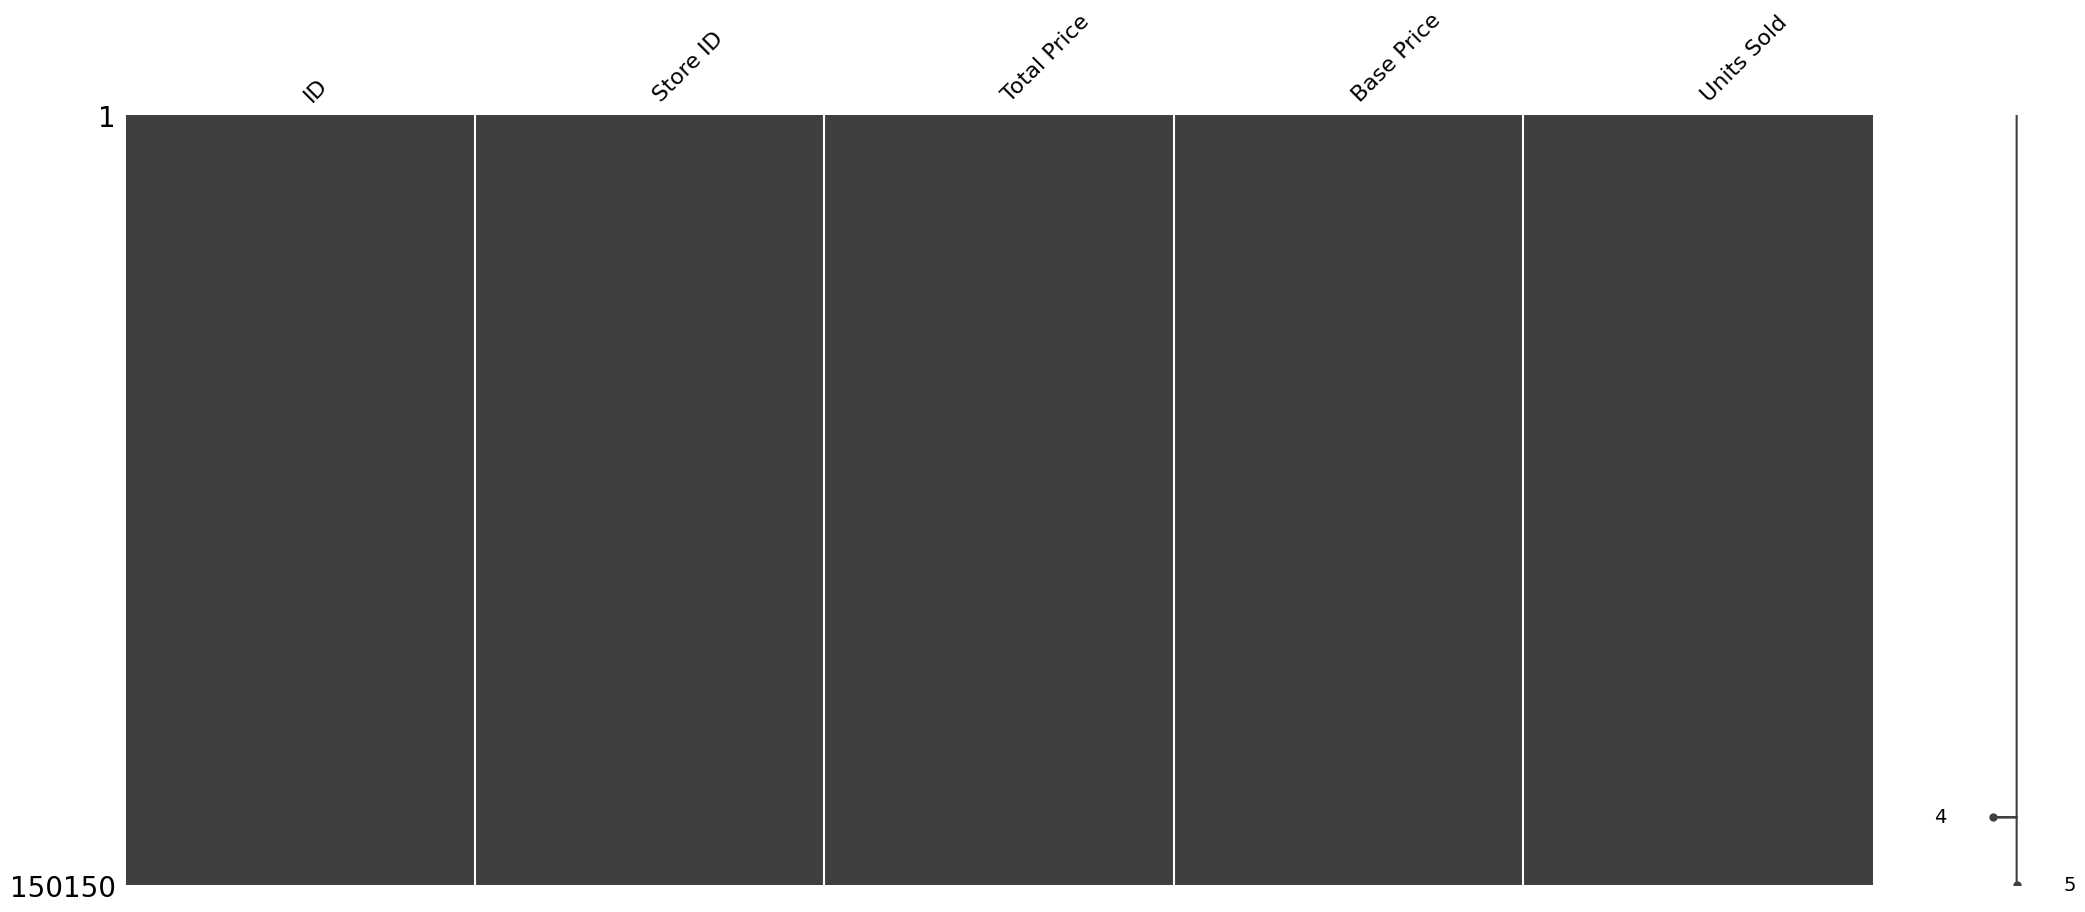

<Figure size 1000x600 with 0 Axes>

In [10]:
import missingno as msno 
msno.matrix(data)
plt.figure(figsize=(10,6))
plt.show()

<AxesSubplot: >

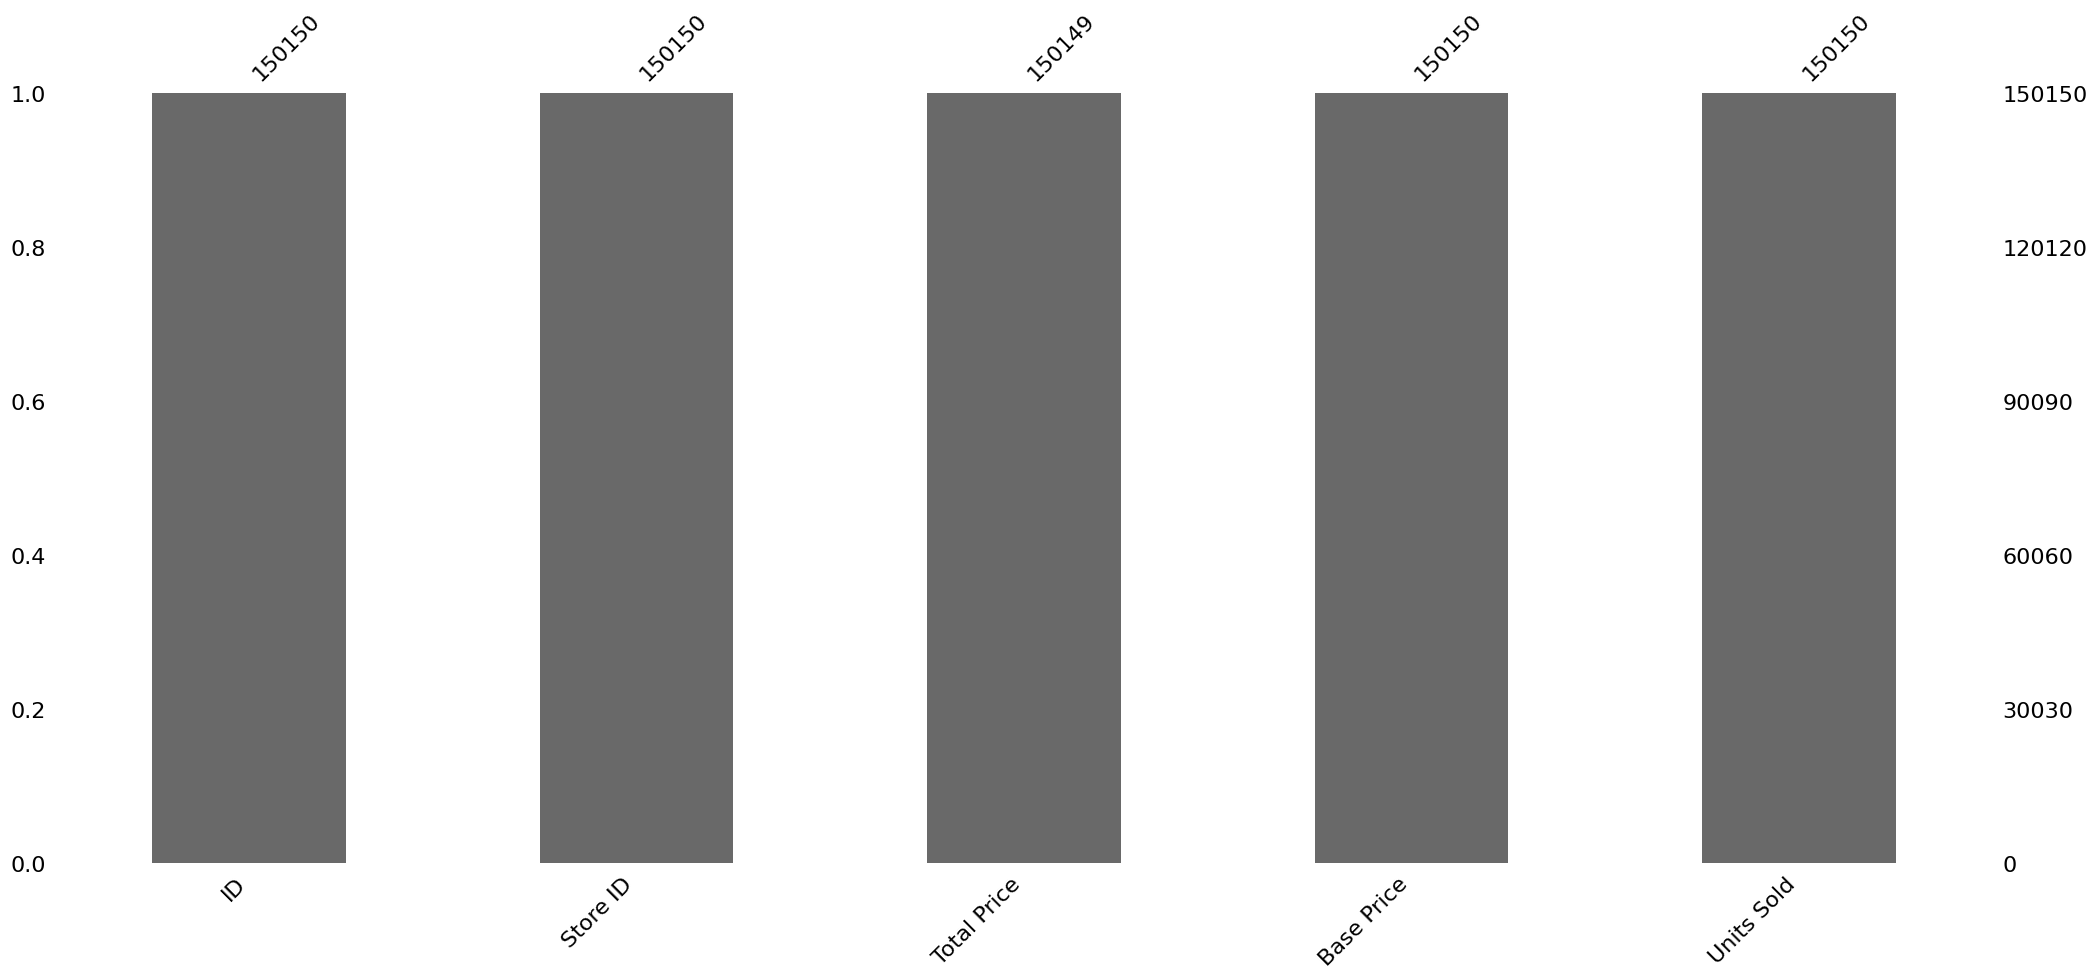

In [11]:
msno.bar(data)

## 1.Delete the missing value

In [61]:
data = data.dropna()

In [62]:
data.shape

(150149, 5)

## 2.Replacing with an arbitrary value

In [15]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [16]:
data['Total Price'] = data['Total Price'].fillna(data['Base Price'])

In [17]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [18]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,469.5375,469.5375,1


## 3.Replacing with the Mean

In [20]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [21]:
data['Total Price'] = data['Total Price'].fillna(data['Base Price'].mean())

In [22]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [23]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,219.425927,469.5375,1


## 4.Replacing with the Mode

In [25]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [26]:
data['Total Price'] = data['Total Price'].fillna(data['Base Price'].mode()[0])

In [27]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [28]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,205.9125,469.5375,1


## 5.Replacing with the Median

In [30]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [31]:
data['Total Price'] = data['Total Price'].fillna(data['Base Price'].median())

In [32]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [33]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,205.9125,469.5375,1


## 6.Replacing with the Previous value – forward fill

In [35]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [36]:
data = data.fillna(method = "ffill")

In [37]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [38]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,241.5375,469.5375,1


## 7.Replacing with the Next value – backward fill

In [40]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [41]:
data = data.fillna(method = "bfill")

In [42]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [43]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,88.35,469.5375,1


## 7.Interpolation

In [45]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [46]:
data = data.interpolate()

In [47]:
data.isnull().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

In [48]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,164.94375,469.5375,1


 ## 8.Multivariate Approach

### 8.1 Iterative Imputer

In [50]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [51]:
X = data[['Total Price','Base Price','Units Sold']]

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)[136949]

array([435.53632734, 469.5375    ,   1.        ])

### 8.2 KNN Imputer

In [54]:
data.loc[[136949]]

,ID,Store ID,Total Price,Base Price,Units Sold
136949,193915,9436,NaN,469.5375,1


In [55]:
X = data[['Total Price','Base Price','Units Sold']]

In [56]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)[136949]

array([469.5375, 469.5375,   1.    ])

## Spliting the Data

In [63]:
# Define the features (X) and target variable (y)
X = data[['Store ID', 'Total Price', 'Base Price']]
y = data['Units Sold']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Features Scaling

### 1.Standardization

In [58]:
Std = preprocessing.StandardScaler()
X_train = Std.fit_transform(X_train)
X_test = Std.fit_transform(X_test)
X_train

array([[ 0.41709875, -1.15840409, -1.19369132],
       [ 0.36676581, -1.18600747, -1.21938245],
       [-0.14143448,  0.17345926,  0.04590534],
       ...,
       [-1.04580369, -1.3240244 , -1.18084576],
       [-1.42898346, -0.2819966 ,  0.18078374],
       [ 0.45444254, -0.14397967, -0.24954257]])

### 2. Normalization

In [64]:
norm = preprocessing.Normalizer()
X_train=norm.fit_transform(X_train)
X_test=norm.fit_transform(X_test)
X_test

array([[0.99945984, 0.0232381 , 0.0232381 ],
       [0.99937338, 0.0250284 , 0.0250284 ],
       [0.99945594, 0.01732997, 0.02806224],
       ...,
       [0.99862972, 0.03322495, 0.04043248],
       [0.99738054, 0.04366533, 0.05766624],
       [0.99984938, 0.01227237, 0.01227237]])